In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv("train_HK6lq50.csv")
df1 = pd.read_csv("test_Yix80N0.csv")

In [3]:
print(df.shape, df1.shape)

(73147, 16) (4500, 4)


In [16]:
df.head(10)

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1
5,12531_23,T_3,T,134,23,offline,intermediate,12531,F,High School Diploma,1,29.0,4,N,2.0,0
6,17874_144,Y_2,Y,120,144,online,easy,17874,M,Bachelors,2,48.0,3,N,3.0,1
7,8129_61,U_1,U,134,61,online,easy,8129,M,Matriculation,2,45.0,1,N,1.0,1
8,5652_57,U_1,U,134,57,offline,easy,5652,M,Matriculation,4,NaN,3,N,3.0,1
9,17019_153,Y_1,Y,136,153,offline,hard,17019,M,Bachelors,3,28.0,2,N,4.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         73147 non-null  object 
 1   program_id                 73147 non-null  object 
 2   program_type               73147 non-null  object 
 3   program_duration           73147 non-null  int64  
 4   test_id                    73147 non-null  int64  
 5   test_type                  73147 non-null  object 
 6   difficulty_level           73147 non-null  object 
 7   trainee_id                 73147 non-null  int64  
 8   gender                     73147 non-null  object 
 9   education                  73147 non-null  object 
 10  city_tier                  73147 non-null  int64  
 11  age                        45418 non-null  float64
 12  total_programs_enrolled    73147 non-null  int64  
 13  is_handicapped             73147 non-null  obj

In [6]:
df.isna().sum()

id                               0
program_id                       0
program_type                     0
program_duration                 0
test_id                          0
test_type                        0
difficulty_level                 0
trainee_id                       0
gender                           0
education                        0
city_tier                        0
age                          27729
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       77
is_pass                          0
dtype: int64

In [7]:
df.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [18]:
df.id.value_counts()

6036_65      1
19799_104    1
12310_174    1
17568_45     1
17510_44     1
            ..
7972_32      1
3837_122     1
10433_101    1
12569_91     1
6863_77      1
Name: id, Length: 73147, dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   session_id   4500 non-null   object
 1   startTime    4500 non-null   object
 2   endTime      4500 non-null   object
 3   ProductList  4500 non-null   object
dtypes: object(4)
memory usage: 140.8+ KB


In [10]:
df1.head(10)

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/
5,u11327,27/11/14 8:41,27/11/14 8:47,A00001/B00009/C00028/D13690/;A00001/B00009/C00...
6,u12768,26/11/14 21:23,26/11/14 21:24,A00001/B00031/C00044/D13454/
7,u17011,25/11/14 20:02,25/11/14 20:03,A00001/B00009/C00028/D11956/
8,u13527,20/12/14 16:26,20/12/14 16:26,A00002/B00003/C00005/D26497/
9,u24492,18/12/14 13:15,18/12/14 13:19,A00001/B00001/C00019/D04978/;A00001/B00001/C00...


In [9]:
df1.isna().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
dtype: int64

In [11]:
df.gender.value_counts()

M    39043
F    34104
Name: gender, dtype: int64

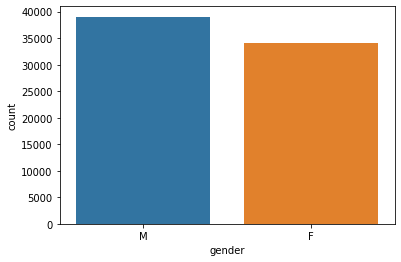

In [14]:
sns.countplot(df.gender)